In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
# from datetime import datetime
# from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
scrubbed_data = pd.read_csv('../raw_data/scrubbed.csv', low_memory=False); scrubbed_data.dtypes

datetime                 object
city                     object
state                    object
country                  object
shape                    object
duration (seconds)       object
duration (hours/min)     object
comments                 object
date posted              object
latitude                 object
longitude               float64
dtype: object

In [3]:
# scrubbed_data['datetime'] = pd.to_datetime(scrubbed_data['datetime'])

scrubbed_data['datetime'] = scrubbed_data['datetime'].apply(lambda x: x.replace('24:','0:'))
scrubbed_data['datetime'] = pd.to_datetime(scrubbed_data['datetime'])
scrubbed_data.sort_values('datetime', axis=0, ascending=True, inplace=True); scrubbed_data.dtypes

datetime                datetime64[ns]
city                            object
state                           object
country                         object
shape                           object
duration (seconds)              object
duration (hours/min)            object
comments                        object
date posted                     object
latitude                        object
longitude                      float64
dtype: object

In [4]:
data_ = scrubbed_data[scrubbed_data['datetime'] > pd.to_datetime('1999-12-31 23:59:59')]
print(scrubbed_data.shape[0],data_.shape[0])

80332 64826


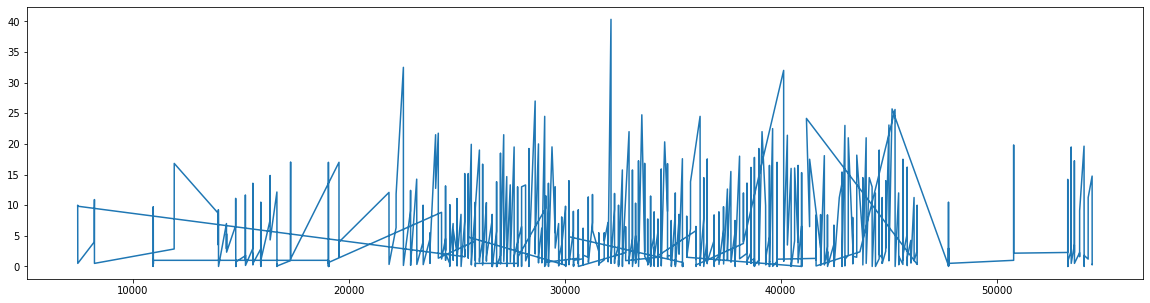

In [5]:
dates_diff_1 = data_['datetime'].diff().apply(lambda x: x.total_seconds()/3600)[1:]
tmp_ = dates_diff_1.head(1000); plt.figure(figsize=(20,5)); plt.plot(tmp_); plt.show()

In [6]:
data_['day'] = data_['datetime'].apply(lambda x: x.strftime("%Y-%m-%d"))
data_['month'] = data_['datetime'].apply(lambda x: x.strftime("%Y-%m"))
data_['month_number'] = data_['datetime'].apply(lambda x: int(x.month))
data_['year_number'] = data_['datetime'].apply(lambda x: int(x.year))

<ipython-input-6-9a3211e62d32>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['day'] = data_['datetime'].apply(lambda x: x.strftime("%Y-%m-%d"))
<ipython-input-6-9a3211e62d32>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['month'] = data_['datetime'].apply(lambda x: x.strftime("%Y-%m"))
<ipython-input-6-9a3211e62d32>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [7]:
seasons = ['winter','winter','spring','spring','spring','summer','summer','summer','autumn','autumn','autumn','winter']
month_to_season = dict(zip(range(1,13), seasons))
data_['season'] = data_.month_number.map(month_to_season)
data_['year_season'] = data_['year_number'].astype(str)+'-'+data_['season']

<ipython-input-7-1e1655517ef7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['season'] = data_.month_number.map(month_to_season)
<ipython-input-7-1e1655517ef7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['year_season'] = data_['year_number'].astype(str)+'-'+data_['season']


In [8]:
data_.year_season

10935    2000-winter
10936    2000-winter
10937    2000-winter
10938    2000-winter
10940    2000-winter
            ...     
46153    2014-spring
46154    2014-spring
46155    2014-spring
46301    2014-spring
46302    2014-spring
Name: year_season, Length: 64826, dtype: object

In [9]:
data_['duration (seconds)'] = data_['duration (seconds)'].apply (lambda x: x.replace("`",""))
data_['duration (seconds)'] = data_['duration (seconds)'].astype(float)

<ipython-input-9-1ad026e0ad4f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['duration (seconds)'] = data_['duration (seconds)'].apply (lambda x: x.replace("`",""))
<ipython-input-9-1ad026e0ad4f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_['duration (seconds)'] = data_['duration (seconds)'].astype(float)


In [10]:
data_stats_by_month_ = data_.groupby(by=['year_season']).agg({'duration (seconds)': 'mean', 'shape': 'count'})
data_stats_by_month_.rename(columns={'shape':'sightings'},inplace=True); data_stats_by_month_.head()

,duration (seconds),sightings
year_season,,
2000-autumn,1108.963888,777
2000-spring,1036.119424,538
2000-summer,1282.039833,826
2000-winter,735.278415,577
2001-autumn,9552.420684,781


In [16]:
data_stats_by_month_ = data_stats_by_month_.reset_index()

<AxesSubplot:xlabel='year_season'>

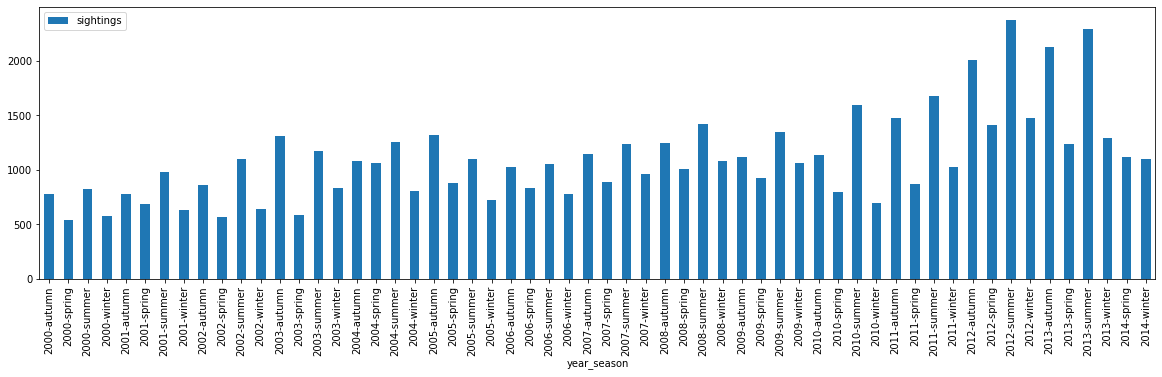

In [18]:
fig, axs = plt.subplots(1,1,figsize=(20,5))
data_stats_by_month_.plot.bar(x='year_season',y='sightings',ax=axs)

In [28]:
data_stats_by_month_['season'] = data_stats_by_month_['year_season'].apply(lambda x: x.split('-')[1])

In [32]:
data_stats_by_month_ = data_.groupby(by=['season']).agg({'duration (seconds)': 'mean', 'shape': 'count'})
data_stats_by_month_.rename(columns={'shape':'sightings'},inplace=True)
data_stats_by_month_ = data_stats_by_month_.reset_index(); data_stats_by_month_.head()

,season,duration (seconds),sightings
0,autumn,2562.289484,17431
1,spring,2122.174799,13404
2,summer,12818.280204,19434
3,winter,3790.665997,13685


<AxesSubplot:xlabel='season'>

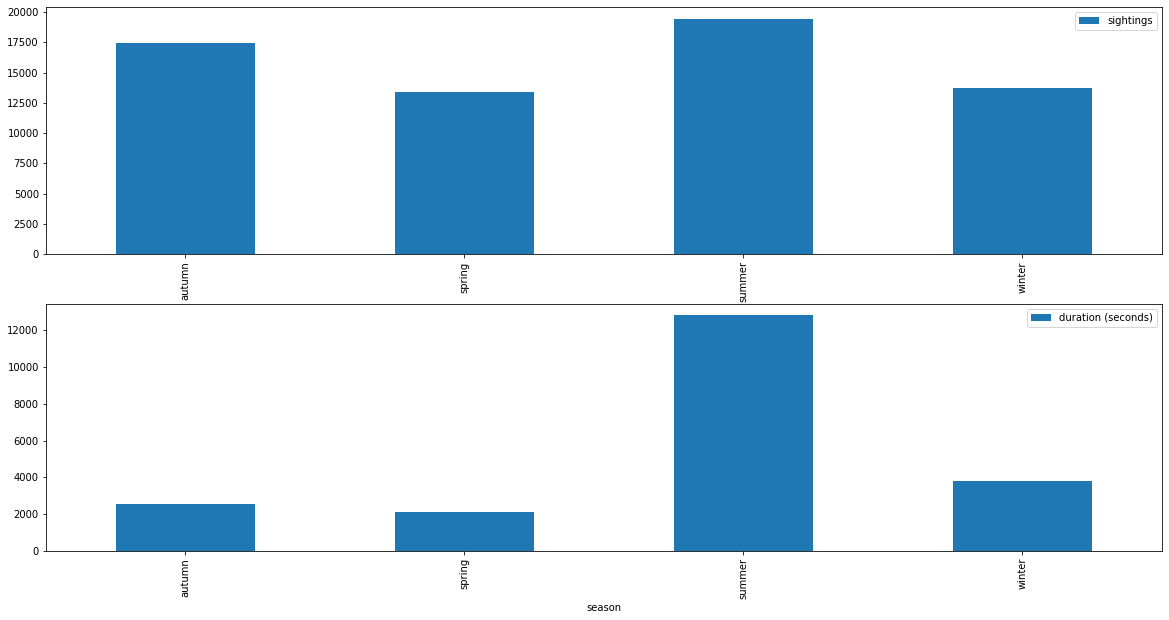

In [41]:
fig, axs = plt.subplots(2,1,figsize=(20,10))
data_stats_by_month_.plot.bar(x='season',y='sightings',ax=axs[0])
data_stats_by_month_.plot.bar(x='season',y='duration (seconds)',ax=axs[1])